# Task

Calculate metrics for each bank that help assess the actual financial condition of the banks.

# Task solving

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load and prepare data

In [52]:
# Load data
barclays_bank = pd.read_excel('/content/1258_Barclays.xlsx', header=1)
basler_bank = pd.read_excel('/content/1275_Basler_Kantonalbank.xlsx',header=1)
kbs_group_bank = pd.read_excel('/content/2938_KBC_Group.xlsx',header=1)
lloyds_tsb_bank = pd.read_excel('/content/3166_Lloyds_TSB_Bank.xlsx',header=1)
abu_dhabi_bank = pd.read_excel('/content/3404_First_Abu_Dhabi_Bank.xlsx',header=1)
nord_luxembourg_bank = pd.read_excel('/content/3537_Nord_LB_Luxembourg.xlsx',header=1)
royal_canada_bank = pd.read_excel('/content/3932_Royal_Bank_of_Canada.xlsx',header=1)
standard_chartered_bank = pd.read_excel('/content/4367_Standard_Chartered.xlsx',header=1)
china_bank = pd.read_excel('/content/916_Bank_of_China.xlsx',header=1)

In [53]:
basler_bank.head()

,Bank Name,Consolidation Level,Country,FYE,Cash and Balance at Central Bank(s) $m,Gross Total Loans $m,Loans and Advances to Financial Institutions $m,Loans and Advances to Corporate Customers $m,Loans and Advances to Public Institutions $m,Loans and Advances to Retail Customers $m,...,Number of ATMs,Employees (Total),Branches (Total),Auditor,Limited Capital Disclosure,Pillar 3,IFRS,National Accounting Standard,US GAAP,Basel
0,Basler Kantonalbank,Bank Holding Company,Switzerland,2024-12-31,8057.950000,42410.972222,1139.994444,5836.256667,0.0,35434.721111,...,0.0,1271.0,34.0,KPMG,No,No,No,Yes,No,3.0
1,Basler Kantonalbank,Bank Holding Company,Switzerland,2023-12-31,8276.564286,43815.100000,363.895238,6508.464286,0.0,36942.740476,...,0.0,1270.0,36.0,KPMG,No,No,No,Yes,No,3.0
2,Basler Kantonalbank,Bank Holding Company,Switzerland,2022-12-31,8789.213043,38910.658696,892.285870,5883.457609,0.0,32134.915217,...,0.0,1241.0,49.0,KPMG,No,No,No,Yes,No,3.0
3,Basler Kantonalbank,Bank Holding Company,Switzerland,2021-12-31,10845.702198,37374.758242,609.648352,5138.242857,0.0,31626.867033,...,0.0,1289.0,49.0,KPMG,No,No,No,Yes,No,3.0
4,Basler Kantonalbank,Bank Holding Company,Switzerland,2020-12-31,13358.320455,40144.973864,2866.110227,5476.139773,0.0,31802.723864,...,0.0,1320.0,45.0,Ernst & Young,No,Yes,No,Yes,No,3.0


In [54]:
basler_bank.tail()

,Bank Name,Consolidation Level,Country,FYE,Cash and Balance at Central Bank(s) $m,Gross Total Loans $m,Loans and Advances to Financial Institutions $m,Loans and Advances to Corporate Customers $m,Loans and Advances to Public Institutions $m,Loans and Advances to Retail Customers $m,...,Number of ATMs,Employees (Total),Branches (Total),Auditor,Limited Capital Disclosure,Pillar 3,IFRS,National Accounting Standard,US GAAP,Basel
33,Basler Kantonalbank,Bank Holding Company,Switzerland,1991-12-31,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,609.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34,Basler Kantonalbank,Bank Holding Company,Switzerland,1990-12-31,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,591.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,Basler Kantonalbank,Bank Holding Company,Switzerland,1989-12-31,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,552.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,Basler Kantonalbank,Bank Holding Company,Switzerland,1988-12-31,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,523.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37,Copyright The Financial Times Ltd 2025. Source...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
barclays_bank.iloc[-1]

,38
Bank Name,Copyright The Financial Times Ltd 2025. Source...
Consolidation Level,NaN
Country,NaN
FYE,NaT
Cash and Balance at Central Bank(s) $m,NaN
...,...
Pillar 3,NaN
IFRS,NaN
National Accounting Standard,NaN
US GAAP,NaN


In [56]:
# Remove the last unnecessary row for all banks if it contains only missing values except for the 'Bank Name' column
barclays_bank.dropna(how='all',subset=[col for col in barclays_bank.columns if col != 'Bank Name'],inplace=True)
basler_bank.dropna(how='all',subset=[col for col in basler_bank.columns if col != 'Bank Name'],inplace=True)
kbs_group_bank.dropna(how='all',subset=[col for col in kbs_group_bank.columns if col != 'Bank Name'],inplace=True)
lloyds_tsb_bank.dropna(how='all',subset=[col for col in lloyds_tsb_bank.columns if col != 'Bank Name'],inplace=True)
abu_dhabi_bank.dropna(how='all',subset=[col for col in abu_dhabi_bank.columns if col != 'Bank Name'],inplace=True)
nord_luxembourg_bank.dropna(how='all',subset=[col for col in nord_luxembourg_bank.columns if col != 'Bank Name'],inplace=True)
royal_canada_bank.dropna(how='all',subset=[col for col in royal_canada_bank.columns if col != 'Bank Name'],inplace=True)
standard_chartered_bank.dropna(how='all',subset=[col for col in standard_chartered_bank.columns if col != 'Bank Name'],inplace=True)
china_bank.dropna(how='all',subset=[col for col in china_bank.columns if col != 'Bank Name'],inplace=True)

In [57]:
basler_bank.tail()

,Bank Name,Consolidation Level,Country,FYE,Cash and Balance at Central Bank(s) $m,Gross Total Loans $m,Loans and Advances to Financial Institutions $m,Loans and Advances to Corporate Customers $m,Loans and Advances to Public Institutions $m,Loans and Advances to Retail Customers $m,...,Number of ATMs,Employees (Total),Branches (Total),Auditor,Limited Capital Disclosure,Pillar 3,IFRS,National Accounting Standard,US GAAP,Basel
32,Basler Kantonalbank,Bank Holding Company,Switzerland,1992-12-31,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,619.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,Basler Kantonalbank,Bank Holding Company,Switzerland,1991-12-31,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,609.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34,Basler Kantonalbank,Bank Holding Company,Switzerland,1990-12-31,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,591.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,Basler Kantonalbank,Bank Holding Company,Switzerland,1989-12-31,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,552.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,Basler Kantonalbank,Bank Holding Company,Switzerland,1988-12-31,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,523.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Calculation of metrics

In [58]:
list(barclays_bank.columns)

['Bank Name',
 'Consolidation Level',
 'Country',
 'FYE',
 'Cash and Balance at Central Bank(s) $m',
 'Gross Total Loans $m',
 'Loans and Advances to Financial Institutions $m',
 'Loans and Advances to Corporate Customers $m',
 'Loans and Advances to Public Institutions $m',
 'Loans and Advances to Retail Customers $m',
 'Allowance for Loan Losses $m',
 'Net Loans $m',
 'Mortgages $m',
 'Trading Securities $m',
 'Available-for-Sale Securities $m',
 'Held-to-Maturity Securities $m',
 'Derivatives (Assets) $m',
 'Total Assets $m',
 'Average Assets $m',
 'Shariah-compliant Assets $m',
 'High Quality Liquid Assets $m',
 'Gross Impaired Loans $m',
 'Stage 1 Loans $m',
 'Stage 2 Loans $m',
 'Stage 3 Loans $m',
 'POCI $m',
 'Allowance for Stage 1 Loans $m',
 'Allowance for Stage 2 Loans $m',
 'Allowance for Stage 3 Loans $m',
 'Allowance for POCI $m',
 'Deposits made by the Central Bank $m',
 'Gross Total Deposits $m',
 'Retail Customer Deposits $m',
 'Deposits by Banks $m',
 'Corporate Custo

In [59]:
banks = [
    barclays_bank,
    basler_bank,
    kbs_group_bank,
    lloyds_tsb_bank,
    abu_dhabi_bank,
    nord_luxembourg_bank,
    royal_canada_bank,
    standard_chartered_bank,
    china_bank
]

metrics_summary = []

for df in banks:
    df = df.sort_values("FYE").reset_index(drop=True)

    bank_name = df["Bank Name"].iloc[-1]

    # 1. Loan-to-Deposit Ratio (LDR)
    df["LDR"] = df["Gross Total Loans $m"] / df["Gross Total Deposits $m"].replace(0, np.nan)

    # 2. Risk-Weighted Asset Intensity
    df["RWA_Intensity"] = df["Total Risk-Weighted Assets $m"] / df["Total Assets $m"].replace(0, np.nan)

    # 3. Net Interest Margin (NIM)
    df["NIM"] = (df["Interest Income $m"] - df["Interest Expenses $m"]) / df["Average Assets $m"].replace(0, np.nan)

    # 4. Cash Shortage Proxy
    df["Cash_Shortage_Proxy"] = df["High Quality Liquid Assets $m"].diff() + df["Deposits by Banks $m"].diff()

    # 5. Negative Operating Leverage
    df["Neg_Operating_Leverage"] = df["Operating Costs $m"].diff() > df["Total Operating Income $m"].diff()

    # 6. Liquidity Cliff Exposure
    df["Liquidity_Cliff"] = df["Total Senior Debt $m"] / df["Total Liabilities $m"].replace(0, np.nan)

    # 7. Core Deposit Mix Ratio
    df["Core_Deposit_Mix"] = df["Retail Customer Deposits $m"] / df["Gross Total Deposits $m"].replace(0, np.nan)

    # 8. FX Mismatch Ratio
    fx_assets = df.get("FX Assets $m", pd.Series(np.zeros(len(df))))
    fx_liabilities = df.get("FX Liabilities $m", pd.Series(np.zeros(len(df))))
    df["FX_Mismatch"] = (fx_assets - fx_liabilities).abs() / df["Total Equity $m"].replace(0, np.nan)

    # 9. Contingent Leverage (Off-Balance Commitments)
    off_balance = df.get("Off-Balance Commitments $m", pd.Series(np.zeros(len(df))))
    df["Contingent_Leverage"] = off_balance / df["Total Equity $m"].replace(0, np.nan)

    # 10. Unrealized Fair Value Losses / Gains (OCI Ratio)
    oci = df.get("Unrealized Gains or Losses on Financial Instruments Designated at Fair Value $m", pd.Series(np.zeros(len(df))))
    df["OCI_Ratio"] = oci / df["Total Equity $m"].replace(0, np.nan)

    # 11. Fair Value Masking Ratio
    net_income = df["Net Income $m"]
    df["Fair_Value_Masking"] = oci / net_income.replace(0, np.nan)

    # 12. Wholesale Funding Dependency
    df["Wholesale_Dependency"] = df["Deposits by Banks $m"] / df["Total Liabilities $m"].replace(0, np.nan)

    # 13. Liquidity Stress Buffer
    outflows_30d = df.get("30-Day Net Outflows $m", pd.Series(np.zeros(len(df))))
    df["Liquidity_Stress_Buffer"] = df["High Quality Liquid Assets $m"] - outflows_30d

    # 14. Behavioral Deposit Volatility (BDV)

    # The dataset does not contain a column for deposit interest rates ('Interest Rate %'),
    # so a full calculation of BDV is not possible.

    # However, we can calculate the basic change in deposits year-over-year (without bank-level detail):

    deposits_per_year = df.groupby('FYE')['Gross Total Deposits $m'].sum().sort_index()
    absolute_change = deposits_per_year.diff()
    percent_change = deposits_per_year.pct_change() * 100
    percent_change = percent_change.replace([np.inf, -np.inf], np.nan)

    # 15. Time to Insolvency
    df["Time_to_Insolvency"] = df["Total Equity $m"] / (-df["Net Income $m"].replace(0, np.nan))

    # 16. Basel Buffer Utilization
    min_cet1 = df.get("Minimum CET1 $m", pd.Series(np.zeros(len(df))))
    df["Buffer_Utilization"] = (df["Net CET1 $m"] - min_cet1) / df["Total Risk-Weighted Assets $m"].replace(0, np.nan)

    # 17. Loan Repricing Gap
    fixed_loan = df.get("Fixed-Rate Loan Maturities $m", pd.Series(np.zeros(len(df))))
    fixed_deposit = df.get("Fixed-Rate Deposit Maturities $m", pd.Series(np.zeros(len(df))))
    df["Loan_Repricing_Gap"] = fixed_loan - fixed_deposit

    # 18. Regulatory Arbitrage Index
    reg_cap = df.get("Regulatory Capital $m", df.get("Tier 1 Capital $m", pd.Series(np.ones(len(df)))))
    df["Reg_Arbitrage_Index"] = df["Net Income $m"] / reg_cap.replace(0, np.nan)

    # 19. Non-Performing Asset Cushion
    df["NPA_Cushion"] = df["Loan Impairment Provisions $m"] / df["Gross Impaired Loans $m"].replace(0, np.nan).replace(0, np.nan)

    # 20. Real Liquidity Position
    liquid_assets = df["Cash and Balance at Central Bank(s) $m"] + df["Deposits by Banks $m"] + df["Available-for-Sale Securities $m"]
    df["Real_Liquidity_Position"] = liquid_assets / df["Total Senior Debt $m"].replace(0, np.nan)


    metrics = {
        "Loan-to-Deposit Ratio (LDR)": df["LDR"].mean(),
        "Risk-Weighted Asset Intensity": df["RWA_Intensity"].mean(),
        "Net Interest Margin (NIM)": df["NIM"].mean(),
        "Cash Shortage Proxy": df["Cash_Shortage_Proxy"].mean(),
        "Negative Operating Leverage": df["Neg_Operating_Leverage"].mean(),
        "Liquidity Cliff Exposure": df["Liquidity_Cliff"].mean(),
        "Core Deposit Mix Ratio": df["Core_Deposit_Mix"].mean(),
        "FX Mismatch Ratio": df["FX_Mismatch"].mean(),
        "Contingent Leverage": df["Contingent_Leverage"].mean(),
        "Unrealized Fair Value Losses / Gains (OCI Ratio)": df["OCI_Ratio"].mean(),
        "Fair Value Masking Ratio": df["Fair_Value_Masking"].mean(),
        "Wholesale Funding Dependency": df["Wholesale_Dependency"].mean(),
        "Liquidity Stress Buffer": df["Liquidity_Stress_Buffer"].mean(),
        "Annual Deposit Growth Rate": percent_change.mean(),
        "Time to Insolvency": df["Time_to_Insolvency"].mean(),
        "Basel Buffer Utilization": df["Buffer_Utilization"].mean(),
        "Loan Repricing Gap": df["Loan_Repricing_Gap"].mean(),
        "Regulatory Arbitrage Index": df["Reg_Arbitrage_Index"].mean(),
        "Non-Performing Asset Cushion": df["NPA_Cushion"].mean(),
        "Real Liquidity Position": df["Real_Liquidity_Position"].mean(),
    }

    metrics_summary.append({"Bank Name": bank_name, **metrics})


final_metrics_df = pd.DataFrame(metrics_summary)
final_metrics_df.set_index("Bank Name", inplace=True)

final_metrics_df

,Loan-to-Deposit Ratio (LDR),Risk-Weighted Asset Intensity,Net Interest Margin (NIM),Cash Shortage Proxy,Negative Operating Leverage,Liquidity Cliff Exposure,Core Deposit Mix Ratio,FX Mismatch Ratio,Contingent Leverage,Unrealized Fair Value Losses / Gains (OCI Ratio),Fair Value Masking Ratio,Wholesale Funding Dependency,Liquidity Stress Buffer,Annual Deposit Growth Rate,Time to Insolvency,Basel Buffer Utilization,Loan Repricing Gap,Regulatory Arbitrage Index,Non-Performing Asset Cushion,Real Liquidity Position
Bank Name,,,,,,,,,,,,,,,,,,,,
Barclays,0.963232,0.110432,0.001888,10730.506757,0.210526,0.071894,0.163152,0.0,0.0,0.006682,0.034276,0.031245,71777.457522,3.215419,-1.427418,0.084714,0.0,0.145593,0.181725,2.057751
Basler Kantonalbank,1.078226,0.218540,0.002265,427.524753,0.243243,0.147477,0.109808,0.0,0.0,0.000000,0.000000,0.094402,1951.238502,6.651250,-9.761704,0.118988,0.0,0.065823,-0.015907,1.231537
KBC Group,0.805244,0.153018,0.004485,3275.839120,0.216216,0.048004,0.252980,0.0,0.0,-0.013325,-0.063060,0.069936,25179.072988,1.383953,-14.006781,0.107419,0.0,0.141447,0.014238,3.694465
Lloyds TSB Bank,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.0,0.172007,NaN,NaN
First Abu Dhabi Bank,0.836410,0.269948,0.004130,277.732402,0.108108,0.065345,0.161365,0.0,0.0,0.000411,0.001600,0.063752,10629.959684,7.503071,-3.376165,0.083140,0.0,0.152418,0.297477,4.672060
Norddeutsche Landesbank Luxembourg,1.373436,0.144211,0.002959,33.736979,0.280000,0.155337,0.011164,0.0,0.0,0.007632,-0.511308,0.304533,0.000000,27.960753,-22.458338,0.173558,0.0,0.063724,NaN,1.378546
Royal Bank of Canada,0.712386,0.153202,0.003393,8943.984812,0.189189,0.015757,0.319465,0.0,0.0,0.001302,0.004177,0.023402,59386.697520,1.251372,-2.912265,0.076415,0.0,0.205826,0.646850,4.119484
Standard Chartered,0.791443,0.174211,0.004785,5721.361111,0.189189,0.069297,0.244500,0.0,0.0,0.003206,0.016611,0.052016,35627.135135,7.028211,-0.464460,0.093274,0.0,0.158339,0.306628,3.231711
Bank of China,0.788284,0.254056,0.004682,32998.363569,0.105263,0.025284,0.385124,0.0,0.0,0.001283,0.004736,0.102327,164627.683843,1.750397,-3.729437,0.078246,0.0,0.132180,0.514123,10.111535


In [66]:
# Save the result
final_metrics_df.to_excel('bank_metrics.xlsx')

In [61]:
final_metrics_df.describe()

,Loan-to-Deposit Ratio (LDR),Risk-Weighted Asset Intensity,Net Interest Margin (NIM),Cash Shortage Proxy,Negative Operating Leverage,Liquidity Cliff Exposure,Core Deposit Mix Ratio,FX Mismatch Ratio,Contingent Leverage,Unrealized Fair Value Losses / Gains (OCI Ratio),Fair Value Masking Ratio,Wholesale Funding Dependency,Liquidity Stress Buffer,Annual Deposit Growth Rate,Time to Insolvency,Basel Buffer Utilization,Loan Repricing Gap,Regulatory Arbitrage Index,Non-Performing Asset Cushion,Real Liquidity Position
count,8.000000,9.000000,9.000000,9.000000,9.000000,8.000000,8.000000,8.0,8.0,8.000000,9.000000,8.000000,9.000000,8.000000,9.000000,8.000000,9.0,9.000000,7.000000,8.000000
mean,0.918583,0.164180,0.003176,6934.338834,0.171304,0.074799,0.205945,0.0,0.0,0.000899,-0.056996,0.092701,41019.916133,7.093053,-6.459619,0.101969,0.0,0.137484,0.277876,3.812136
std,0.217002,0.081246,0.001587,10577.046422,0.085794,0.051481,0.119338,0.0,0.0,0.006412,0.172362,0.089888,53218.227271,8.832792,7.552809,0.032487,0.0,0.046376,0.244344,2.841700
min,0.712386,0.000000,0.000000,0.000000,0.000000,0.015757,0.011164,0.0,0.0,-0.013325,-0.511308,0.023402,0.000000,1.251372,-22.458338,0.076415,0.0,0.063724,-0.015907,1.231537
25%,0.790653,0.144211,0.002265,277.732402,0.108108,0.042324,0.148476,0.0,0.0,0.000309,0.000000,0.046823,1951.238502,1.658786,-9.761704,0.081916,0.0,0.132180,0.097982,1.887950
50%,0.820827,0.153202,0.003393,3275.839120,0.189189,0.067321,0.203826,0.0,0.0,0.001293,0.001600,0.066844,25179.072988,4.933334,-3.376165,0.088994,0.0,0.145593,0.297477,3.463088
75%,0.991981,0.218540,0.004485,8943.984812,0.216216,0.090790,0.269601,0.0,0.0,0.004075,0.004736,0.096383,59386.697520,7.146926,-1.427418,0.110311,0.0,0.158339,0.410375,4.257628
max,1.373436,0.269948,0.004785,32998.363569,0.280000,0.155337,0.385124,0.0,0.0,0.007632,0.034276,0.304533,164627.683843,27.960753,0.000000,0.173558,0.0,0.205826,0.646850,10.111535


## Visualization of the results

In [62]:
sns.set(style="whitegrid")

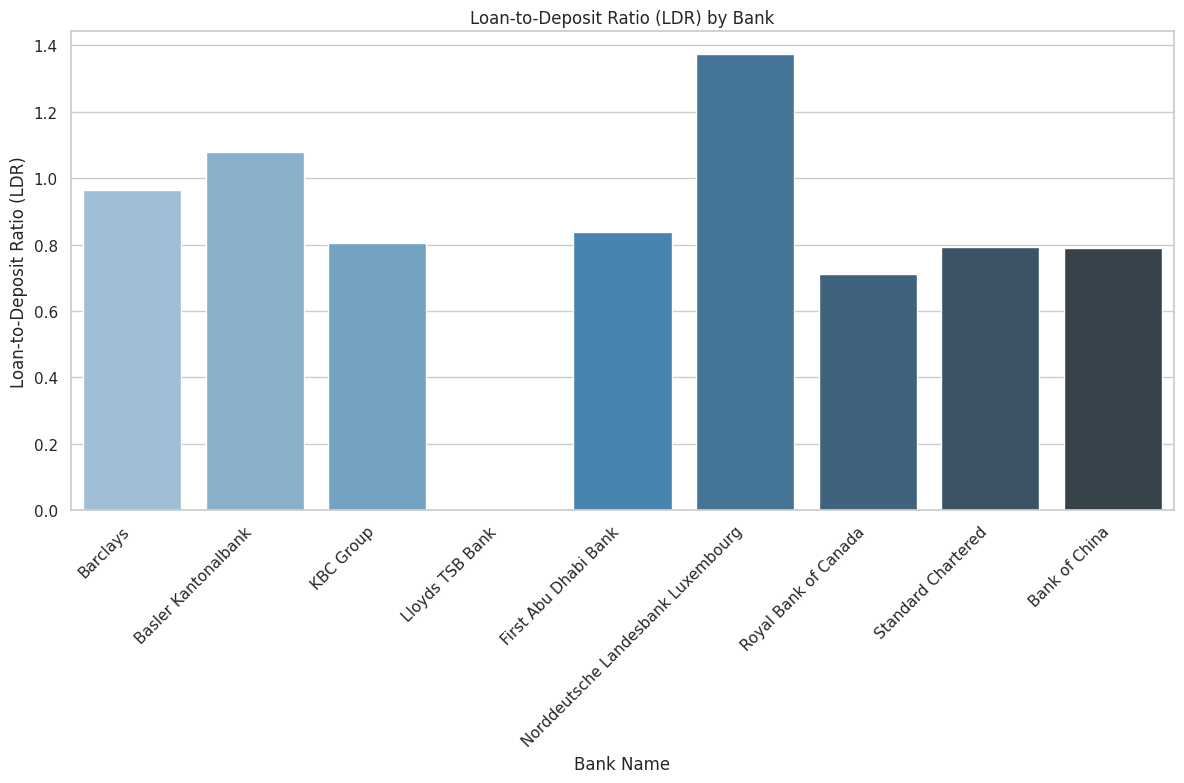

In [63]:
# 1. Barplot: Loan-to-Deposit Ratio by Bank
plt.figure(figsize=(12, 8))
sns.barplot(data=final_metrics_df.reset_index(), x='Bank Name', y='Loan-to-Deposit Ratio (LDR)',
            hue='Bank Name', palette='Blues_d', dodge=False, legend=False)
plt.title('Loan-to-Deposit Ratio (LDR) by Bank')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Loan-to-Deposit Ratio (LDR)')
plt.xlabel('Bank Name')
plt.tight_layout()
plt.show()

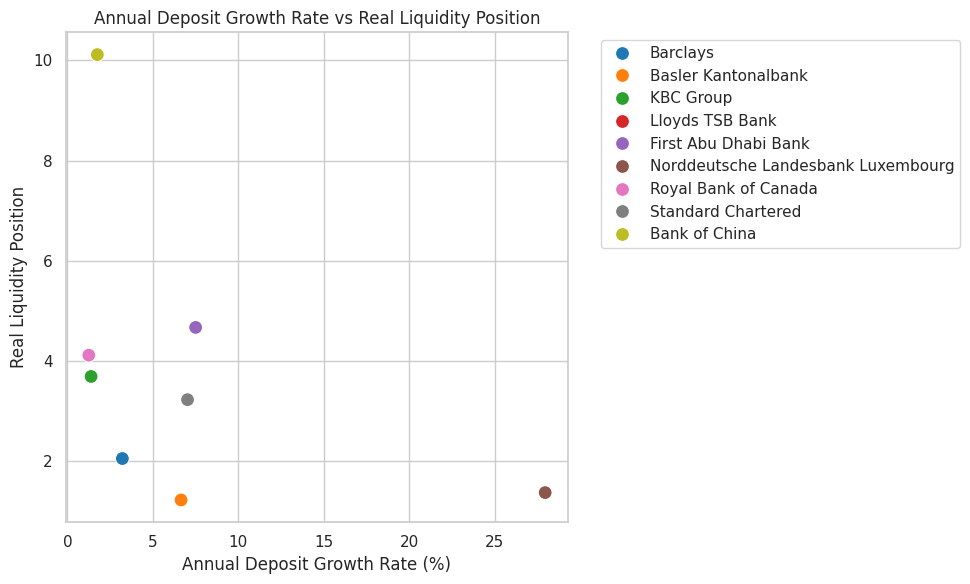

In [64]:
# 2. Scatterplot: Annual Deposit Growth Rate vs Real Liquidity Position
plt.figure(figsize=(10, 6))
sns.scatterplot(data=final_metrics_df.reset_index(), x='Annual Deposit Growth Rate', y='Real Liquidity Position',
                hue='Bank Name', s=100, palette='tab10')
plt.title('Annual Deposit Growth Rate vs Real Liquidity Position')
plt.xlabel('Annual Deposit Growth Rate (%)')
plt.ylabel('Real Liquidity Position')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

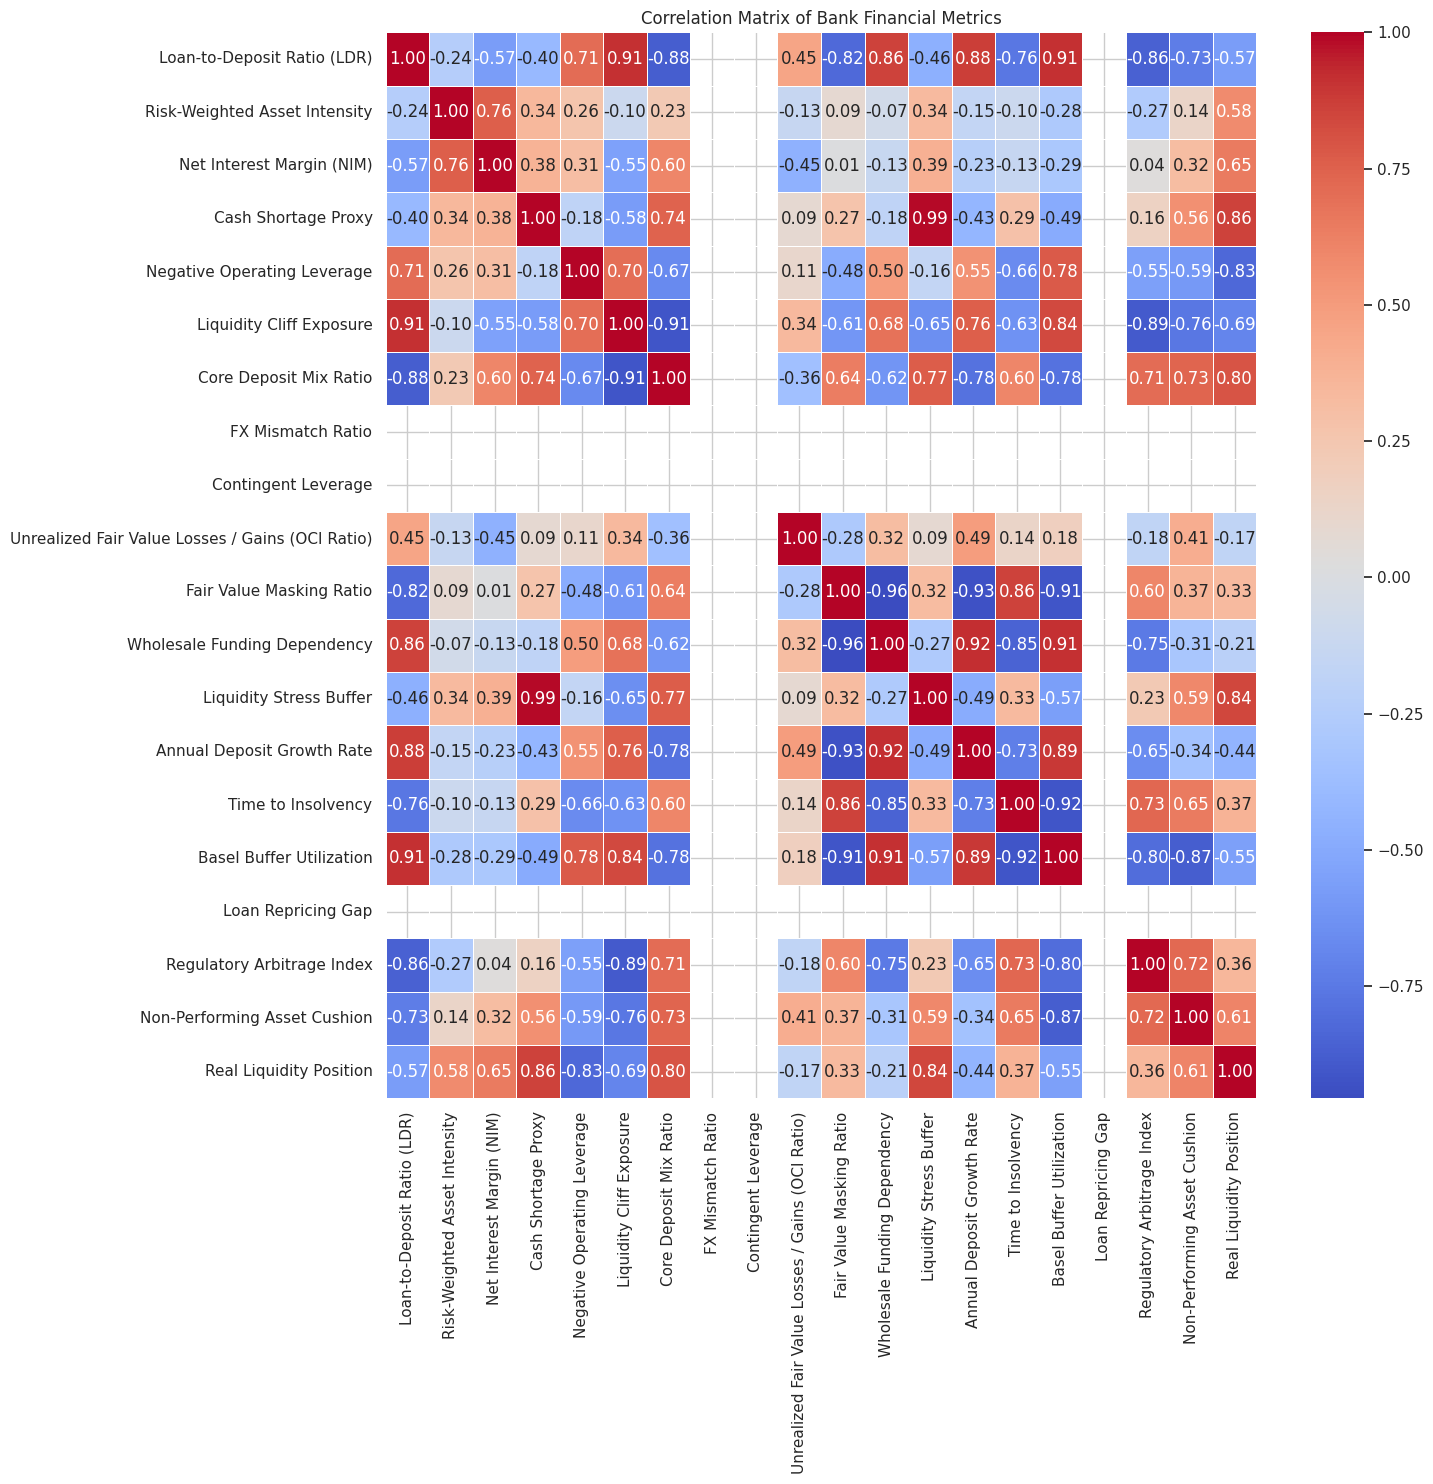

In [65]:
# 3. Heatmap: Correlation matrix of numeric features
plt.figure(figsize=(15, 15))
corr = final_metrics_df.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Bank Financial Metrics')
plt.tight_layout()
plt.show()

# Bank Financial Condition Metrics Report

This report presents an analysis of key financial metrics calculated for several banks to assess their actual financial condition. The metrics were derived from historical financial data and provide insights into liquidity, leverage, asset quality, profitability, and risk exposures.

## Data Preparation

Data for nine banks were collected and cleaned by removing incomplete or irrelevant records. The banks included are:

* Barclays
* Basler Kantonalbank
* KBC Group
* Lloyds TSB Bank
* First Abu Dhabi Bank
* Norddeutsche Landesbank Luxembourg
* Royal Bank of Canada
* Standard Chartered
* Bank of China

## Calculated Metrics

For each bank, the following metrics were computed:

1. **Loan-to-Deposit Ratio (LDR):** Indicates the proportion of loans funded by deposits; a measure of liquidity risk.
2. **Risk-Weighted Asset Intensity:** Ratio of risk-weighted assets to total assets, reflecting asset risk exposure.
3. **Net Interest Margin (NIM):** Profitability measure of net interest income relative to average assets.
4. **Cash Shortage Proxy:** Approximate indicator of cash flow shortages via changes in liquid assets and interbank deposits.
5. **Negative Operating Leverage:** Frequency of operating costs growing faster than operating income, signaling profitability pressure.
6. **Liquidity Cliff Exposure:** Proportion of senior debt within total liabilities, indicating potential liquidity risk at maturity.
7. **Core Deposit Mix Ratio:** Share of retail customer deposits in total deposits, reflecting funding stability.
8. **FX Mismatch Ratio:** Foreign exchange asset and liability imbalance relative to equity, highlighting currency risk.
9. **Contingent Leverage:** Off-balance sheet commitments relative to equity, indicating potential hidden leverage.
10. **Unrealized Fair Value Losses / Gains (OCI Ratio):** Impact of unrealized gains or losses on equity.
11. **Fair Value Masking Ratio:** Unrealized fair value effects relative to net income, identifying earnings volatility risk.
12. **Wholesale Funding Dependency:** Proportion of funding from other banks, indicating dependency on wholesale markets.
13. **Liquidity Stress Buffer:** Difference between high-quality liquid assets and expected 30-day outflows.
14. **Annual Deposit Growth Rate:** Year-over-year percentage change in total deposits, showing funding growth.
15. **Time to Insolvency:** Estimated time for equity depletion based on net income.
16. **Basel Buffer Utilization:** Usage level of regulatory capital buffers relative to risk-weighted assets.
17. **Loan Repricing Gap:** Difference between fixed-rate loan and deposit maturities, indicating interest rate risk.
18. **Regulatory Arbitrage Index:** Net income relative to regulatory capital, highlighting capital efficiency.
19. **Non-Performing Asset Cushion:** Loan impairment provisions relative to impaired loans, showing coverage of problem assets.
20. **Real Liquidity Position:** Ratio of liquid assets to senior debt, assessing liquidity adequacy.

## Summary of Findings

* **Liquidity and Funding:**
  Most banks show moderate Loan-to-Deposit Ratios, indicating balanced use of deposits for lending. Core deposit ratios vary, with some banks relying more heavily on retail deposits, which typically offer more stable funding. Wholesale funding dependency is generally low to moderate, reducing short-term liquidity risks.

* **Profitability and Risk:**
  Net Interest Margins are positive but vary across banks, reflecting differences in business models and market environments. Negative operating leverage occurrences suggest some banks face pressures on profitability due to rising costs. FX mismatch ratios highlight certain banks’ exposure to currency risks.

* **Capital Adequacy and Asset Quality:**
  Basel buffer utilization is generally conservative, suggesting regulatory capital buffers remain available. Non-performing asset cushions indicate adequate provisions for impaired loans, although variability exists. Regulatory arbitrage indices point to diverse capital efficiency levels.

* **Liquidity Stress and Insolvency Risk:**
  Liquidity stress buffers are positive for most banks, suggesting resilience to short-term liquidity shocks. Time to insolvency estimates vary widely, reflecting differing profitability and capital strength.

## Conclusion

This multi-metric analysis provides a comprehensive view of the financial health of the examined banks. While most banks maintain adequate liquidity and capital buffers, some show signs of profitability challenges or increased risk exposures. Ongoing monitoring and risk management are essential to sustain financial stability.

